# Assignment_15_KNN_Glass


Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps





In [44]:
import pandas as pd

In [45]:
glass = pd.read_csv("D:\Data Science\Assignments\glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# EDA

In [46]:
glass.shape  # row and column 

(214, 10)

In [47]:
glass.columns  # columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [48]:
glass.index   # rows

RangeIndex(start=0, stop=214, step=1)

In [49]:
glass.info()  # checking datatypes and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [50]:
glass.describe()   # discriptive statistics

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [51]:
print(glass['Type'].unique())  # unique values
print(glass['Ba'].unique())
print(glass['Fe'].unique())

[1 2 3 5 6 7]
[0.   0.09 0.11 0.69 0.14 3.15 0.27 0.06 0.15 2.2  0.24 1.19 1.63 1.68
 0.76 0.64 0.4  1.59 1.57 0.61 0.81 0.66 0.53 0.63 0.56 1.71 0.67 1.55
 1.38 2.88 0.54 1.06 1.64 1.67]
[0.   0.26 0.11 0.24 0.17 0.07 0.19 0.14 0.22 0.06 0.3  0.16 0.1  0.09
 0.31 0.03 0.12 0.32 0.15 0.2  0.34 0.28 0.08 0.29 0.21 0.18 0.25 0.35
 0.37 0.51 0.05 0.01]


In [52]:
glass['Type'].value_counts()    # value counts

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [53]:
# To split the observations into two part we find median
print("Mean is:", glass['Type'].mean())
print("Median is:", glass['Type'].median())

Mean is: 2.7803738317757007
Median is: 2.0


In [54]:
# We split the variables into two parts using median
type = []
for value in glass['Type']:
    if value<=1:
        type.append(0)
    else:
        type.append(1)
glass['type'] = type

In [55]:
glass['type'].value_counts()

1    144
0     70
Name: type, dtype: int64

In [56]:
glass[glass.duplicated()]  # Check duplicated columns

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1,0


In [57]:
glass.drop("Type", axis = 1, inplace = True)  # Drop repeated column

In [58]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,0


In [59]:
glass.corr()   # Find Correlation between variables

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.081202
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.141691
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.420498
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.393398
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.028685
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,0.053178
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.078411
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.228161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,0.000067
type,-0.081202,0.141691,-0.420498,0.393398,0.028685,0.053178,0.078411,0.228161,0.000067,1.000000


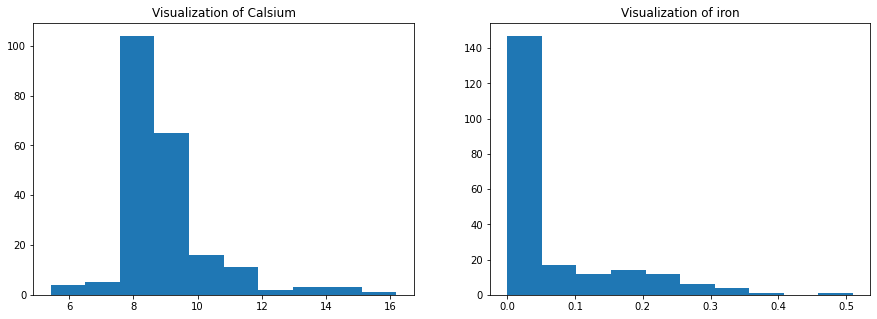

In [88]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 1,ncols = 2, figsize=(15,5))
ax[0].hist('Ca', data = glass); ax[0].set_title('Visualization of Calsium')
ax[1].hist('Fe', data = glass); ax[1].set_title("Visualization of iron")
plt.show()

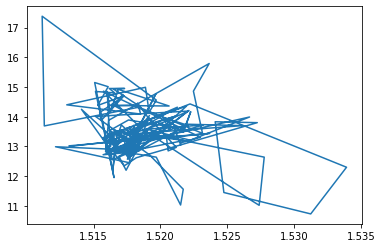

In [90]:
plt.plot('RI', 'Na', data = glass)  # Relationship between Refractive Index and Sodium of animals

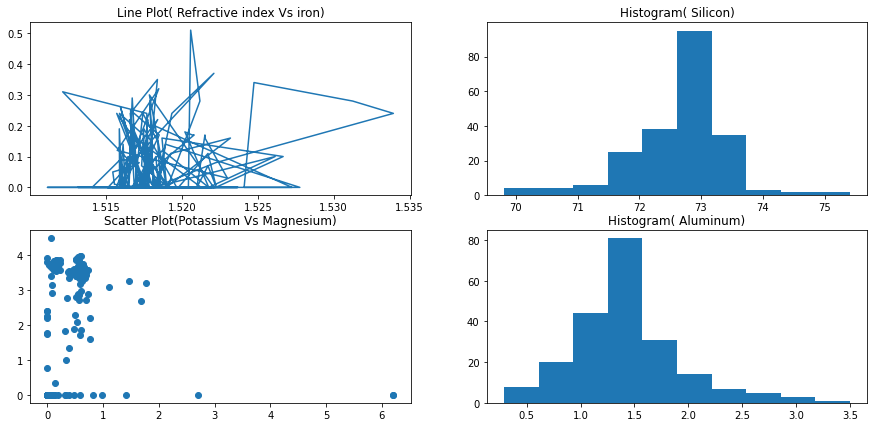

In [92]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15,7))
ax[0,0].plot('RI', 'Fe', data = glass);ax[0,0].set_title("Line Plot( Refractive index Vs iron)")
ax[0,1].hist('Si', data = glass);ax[0,1].set_title("Histogram( Silicon)")
ax[1,0].scatter('K', 'Mg', data = glass);ax[1,0].set_title("Scatter Plot(Potassium Vs Magnesium)")
ax[1,1].hist('Al', data = glass);ax[1,1].set_title("Histogram( Aluminum)")
plt.show()

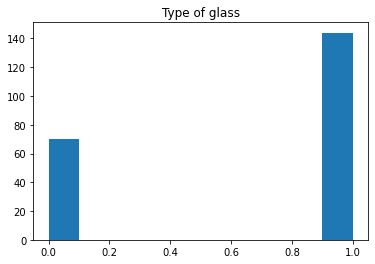

In [95]:
plt.hist('type', data= glass); plt.title("Type of glass")
plt.show()

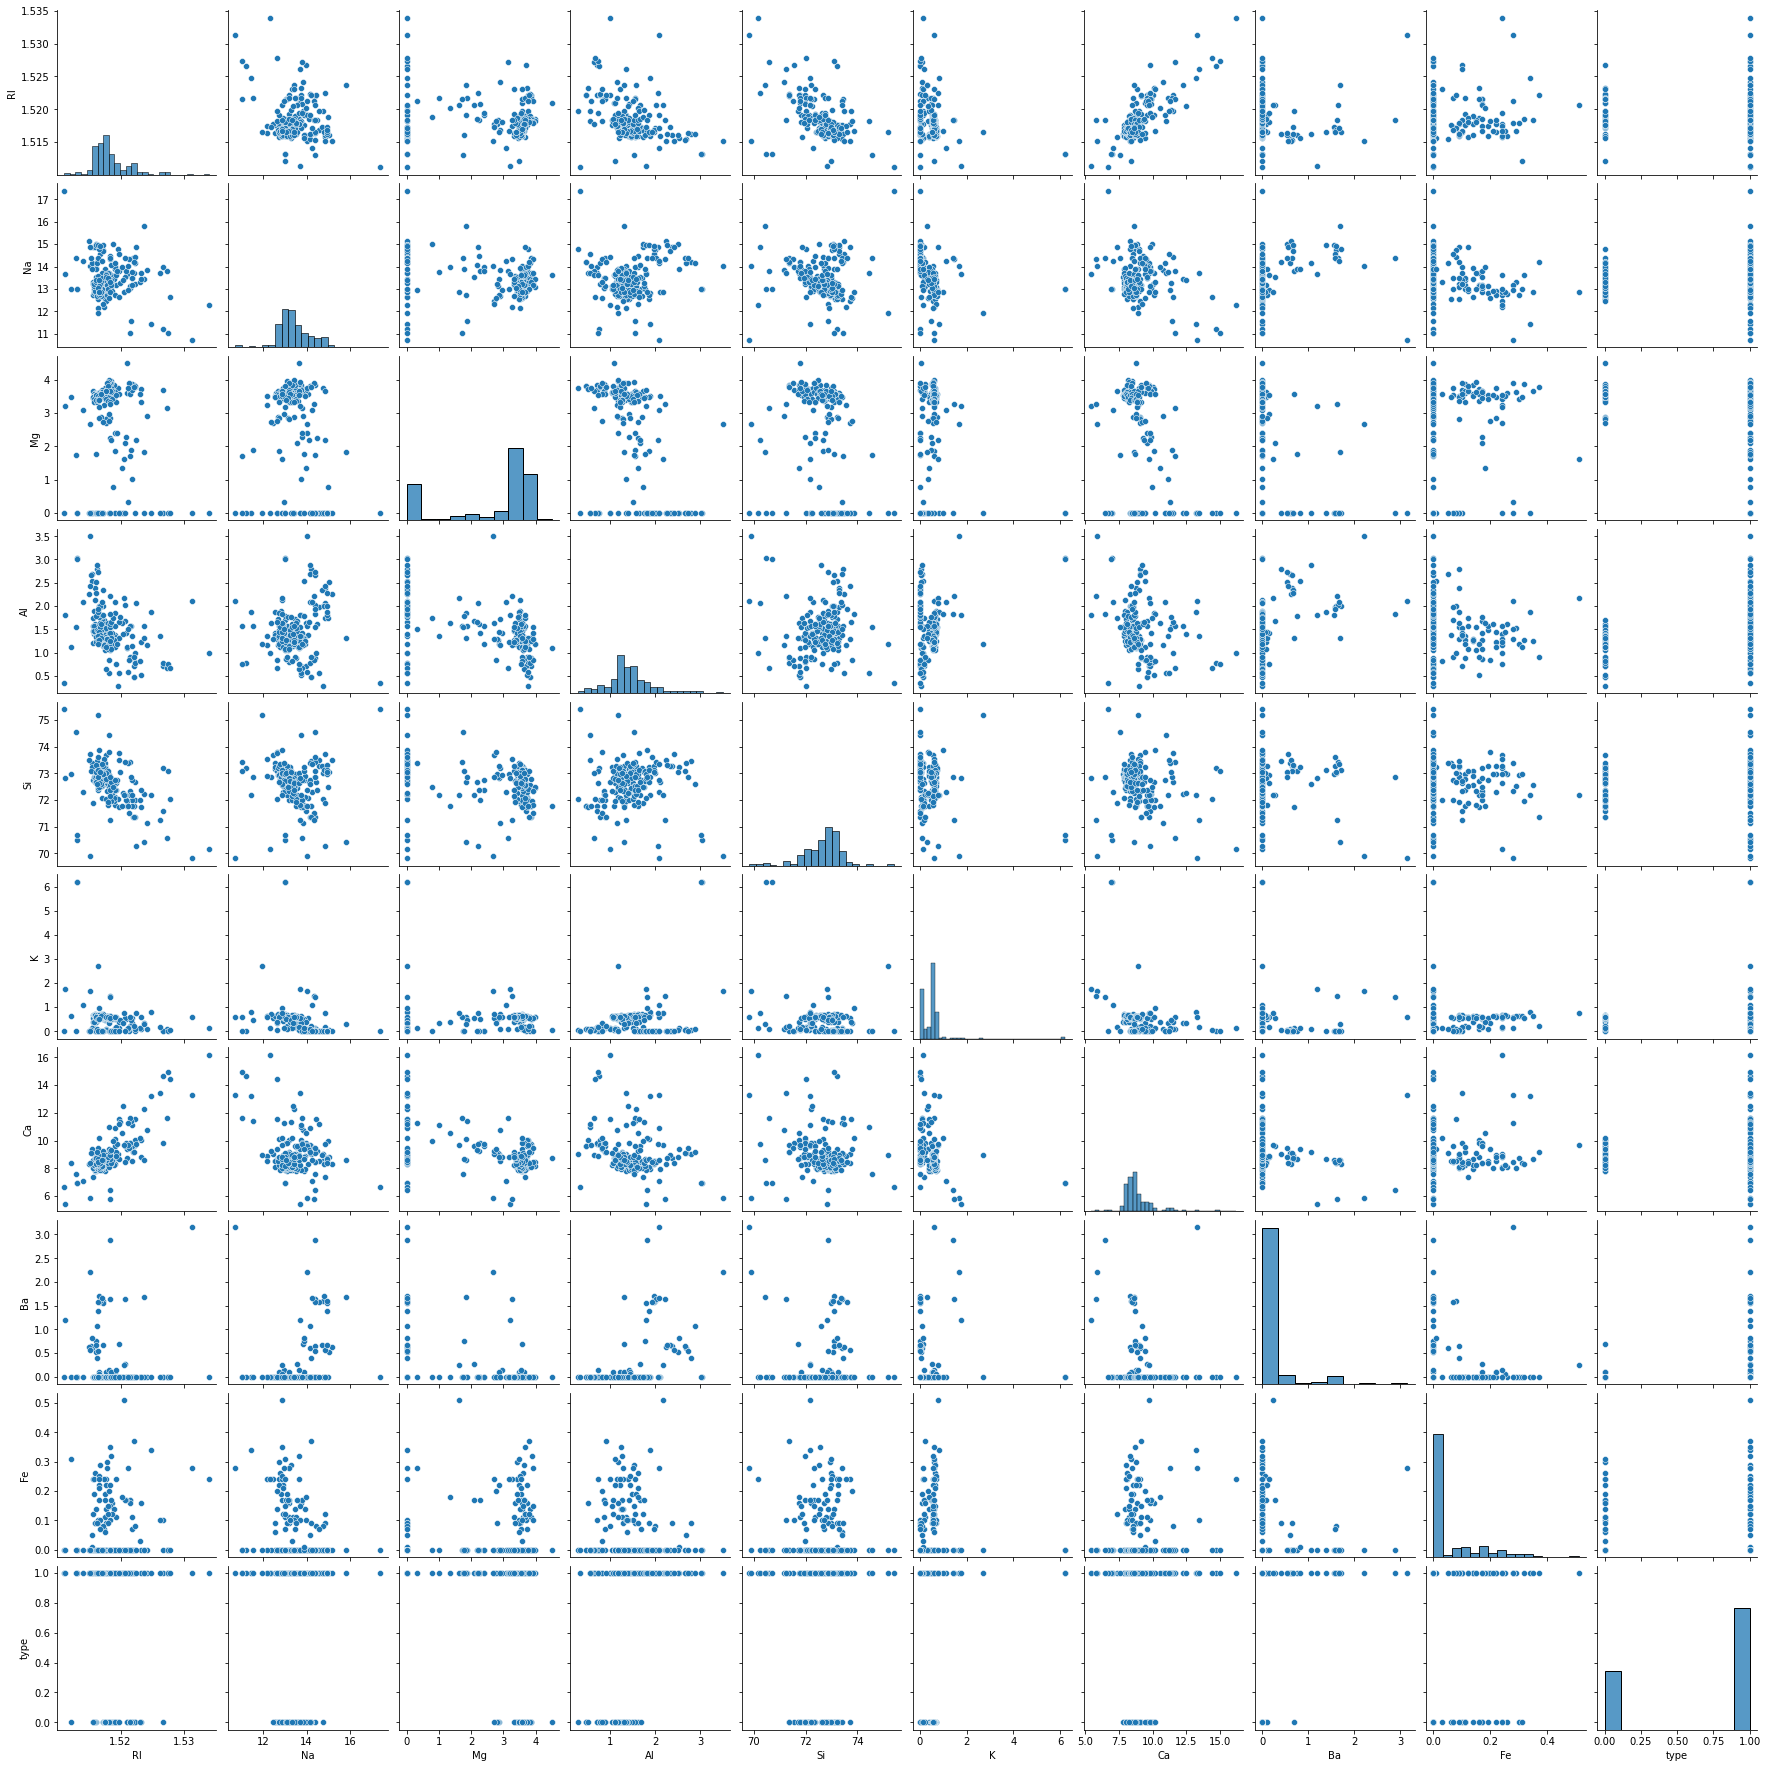

In [60]:
# plot pairplot for visualization all in one.
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(glass)
plt.show()

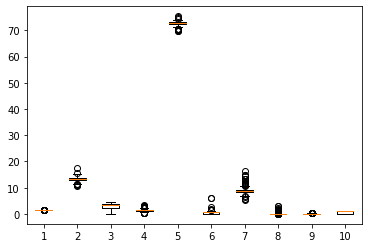

In [61]:
# to find outliers exist or not.
plt.boxplot(glass)  
plt.show()

# KNN Classification

In [62]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [63]:
array = glass.values
X , Y = array[0:,:-1], array[:,-1]
print(X)
print(Y)

[[ 1.52101 13.64     4.49    ...  8.75     0.       0.     ]
 [ 1.51761 13.89     3.6     ...  7.83     0.       0.     ]
 [ 1.51618 13.53     3.55    ...  7.78     0.       0.     ]
 ...
 [ 1.52065 14.36     0.      ...  8.44     1.64     0.     ]
 [ 1.51651 14.38     0.      ...  8.48     1.57     0.     ]
 [ 1.51711 14.23     0.      ...  8.62     1.67     0.     ]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

In [64]:
print(X.shape)
print(Y.shape)

(214, 9)
(214,)


In [65]:
kfold = KFold(n_splits=10)

In [66]:
'''Cross_val_score is a function in the scikit-learn package which trains and tests a model over multiple folds of your dataset. 
This cross validation method gives you a better understanding of model performance over the whole dataset instead of just
a single train/test split.'''

model = KNeighborsClassifier(n_neighbors = 12)
results = cross_val_score(model, X, Y, cv = kfold)
print(results.mean())

0.6733766233766233


# Grid search for Algorithm Tuning

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [69]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid = param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [70]:
print(grid.best_score_)

0.780952380952381


# ---------------------------------------------------------------------------------------------------------------

# Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
import pickle

In [72]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
type    0
dtype: int64

In [73]:
# Dividing dataset into input and output
X = glass.iloc[:,:-1]
Y = glass.iloc[:,-1]
print(X)
print(Y)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]
0      0
1      0
2      0
3      0
4      0
      ..
209    1
210    1
211    1
212    1
213    1
Name: type, Length: 214, dtype: int64


In [74]:
# Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X, Y)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
# Save the model to disk
filename = 'finalized_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [76]:
# Predict for X dataset
pickle.load(open(filename, 'rb'))
#classifier.read_pickle_file(/content/fialized_model.sav)
y_pred = classifier.predict(X)

In [77]:
y_pred_glass = pd.DataFrame({'actual': Y, 'predicted_prob': classifier.predict(X)})

In [78]:
y_pred_glass

,actual,predicted_prob
0,0,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
209,1,1
210,1,1
211,1,1
212,1,1


In [79]:
# Confusion matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[ 34  36]
 [ 22 122]]


In [80]:
((140+44)/(140+6+24+44))*100

85.98130841121495

In [81]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.49      0.54        70
           1       0.77      0.85      0.81       144

    accuracy                           0.73       214
   macro avg       0.69      0.67      0.67       214
weighted avg       0.72      0.73      0.72       214



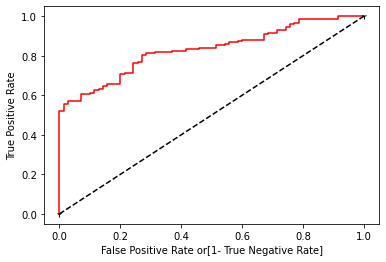

In [82]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color = 'red', label = 'logit model(area = %0.2f)' %auc)
plt.plot([0,1], [0,1], 'k--1')
plt.xlabel('False Positive Rate or[1- True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [83]:
auc   # Accuracy

0.666468253968254

# ---------------------------------------------------------------------------------------------------------------

# Decision Tree

In [84]:
# Model Building, Training, Testing
X = glass.iloc[:,:-1]
Y = glass.iloc[:,-1]

In [85]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 40)

In [175]:
# Building Decision Tree Classifier Using Entropy Criteria
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [176]:
model

DecisionTreeClassifier(max_depth=3)

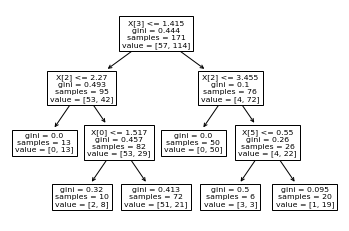

In [177]:
# Plot the Decision Tree
from sklearn import tree
tree.plot_tree(model);

In [178]:
Y_train.value_counts().keys()

Int64Index([1, 0], dtype='int64')

In [179]:
col = glass.columns
col

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'type'], dtype='object')

In [180]:
glass['type'].value_counts()

1    144
0     70
Name: type, dtype: int64

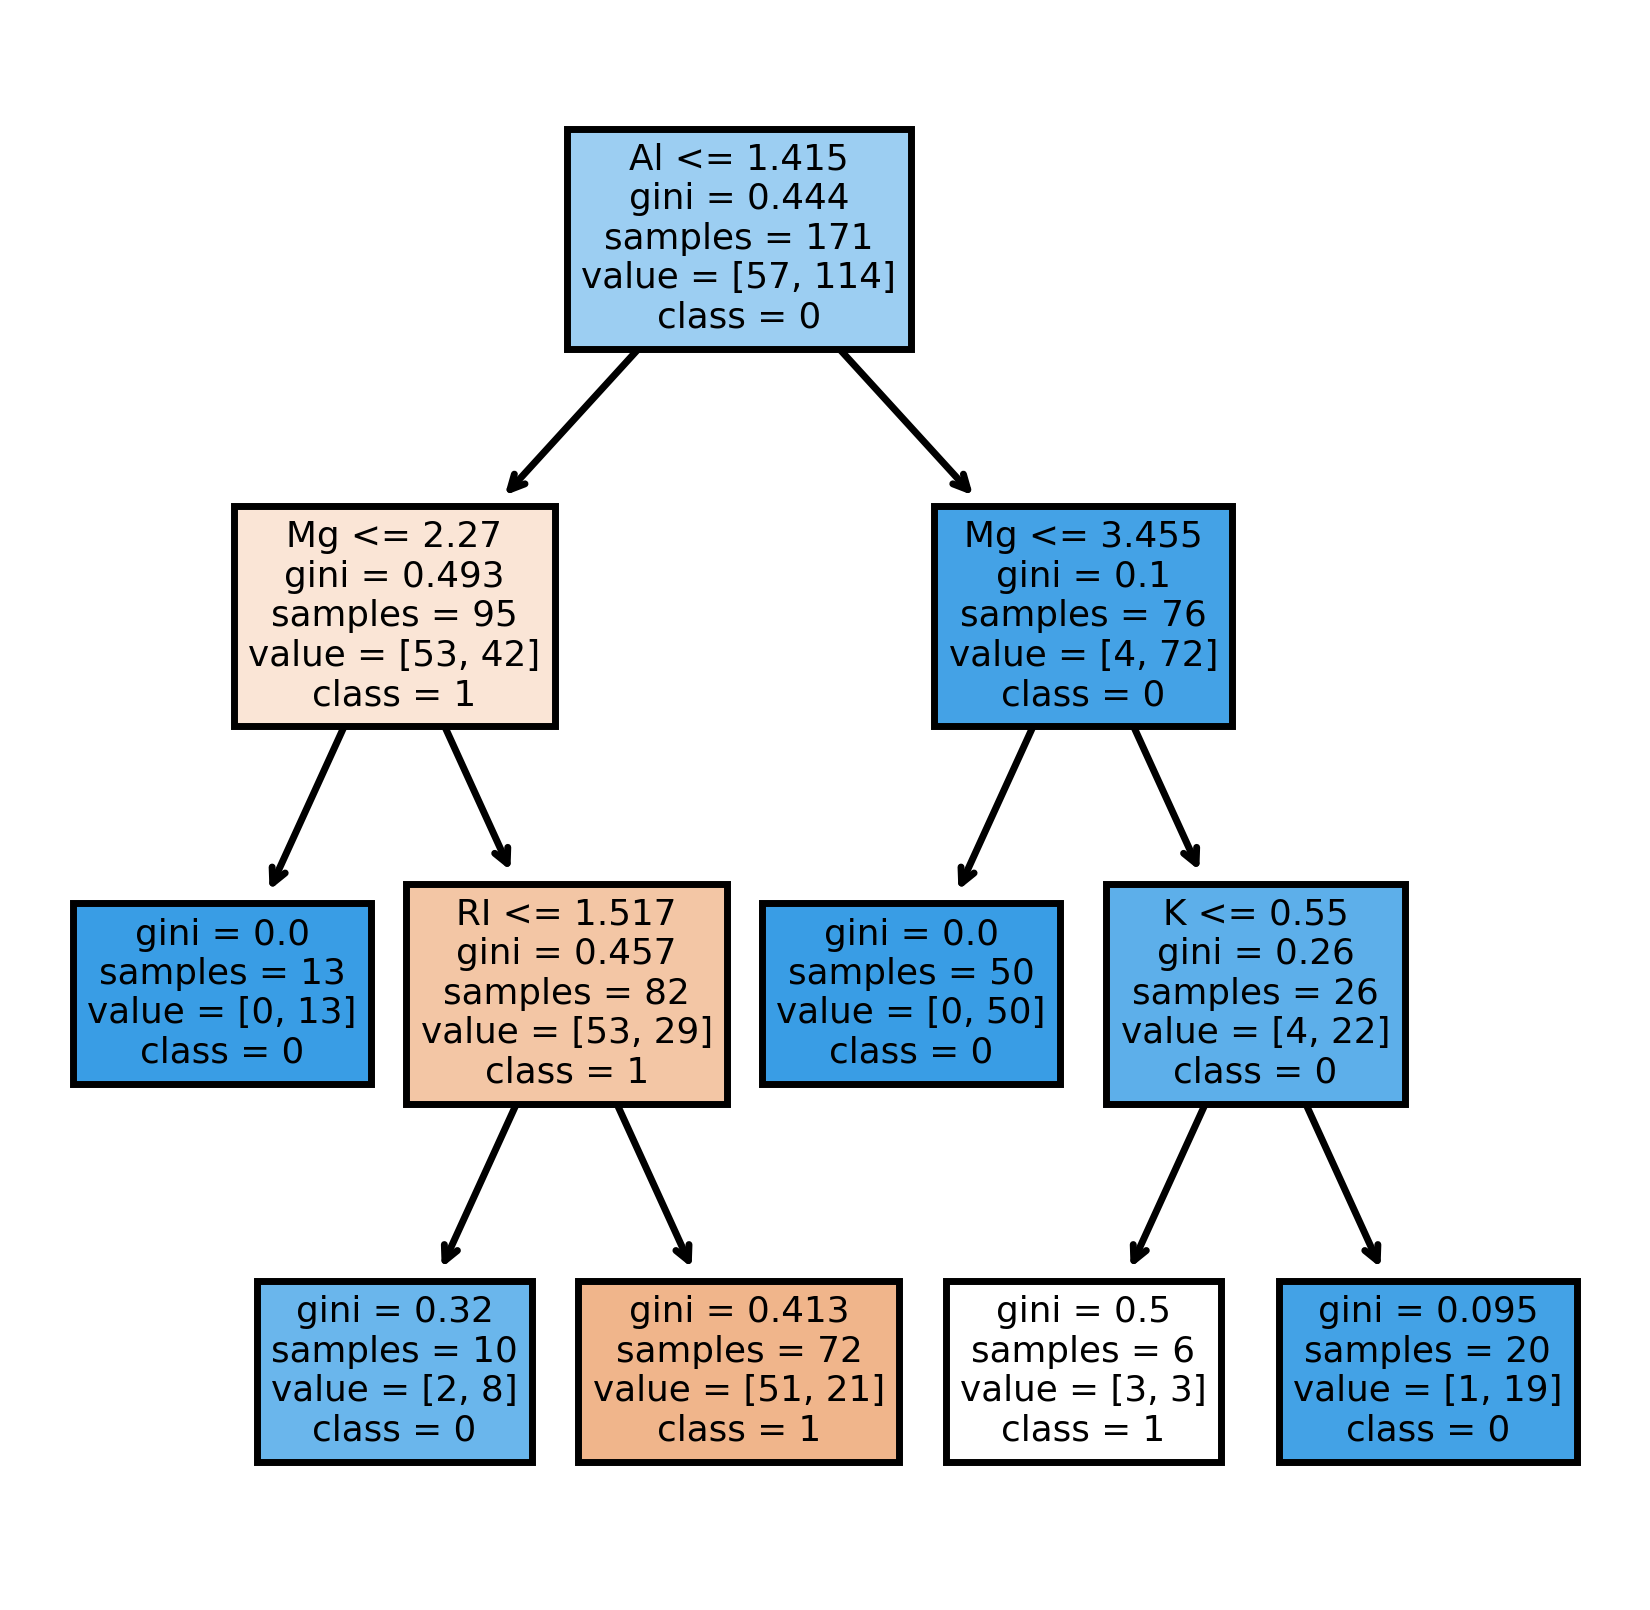

In [181]:
import matplotlib.pyplot as plt
from sklearn import tree
col = (['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'])
cn = ['1','0']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)
tree.plot_tree(model, feature_names = col, class_names = cn, filled = True)
plt.show()

In [182]:
# Predicting on test data
preds = model.predict(X_test)   # Predicting on test data set
pd.Series(preds).value_counts()   # Getting the count of each category

1    26
0    17
dtype: int64

In [183]:
Y_test.value_counts()

1    30
0    13
Name: type, dtype: int64

In [184]:
preds

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1],
      dtype=int64)

In [185]:
pd.crosstab(Y_test, preds) # Getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
type,,
0,10,3
1,7,23


In [186]:
preds, Y_test

(array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1],
       dtype=int64),
 140    1
 62     0
 177    1
 166    1
 175    1
 35     0
 77     1
 5      0
 194    1
 59     0
 96     1
 148    1
 54     0
 89     1
 143    1
 81     1
 26     0
 129    1
 195    1
 46     0
 23     0
 151    1
 149    1
 75     1
 105    1
 190    1
 102    1
 100    1
 28     0
 169    1
 18     0
 116    1
 188    1
 33     0
 37     0
 103    1
 179    1
 137    1
 11     0
 126    1
 86     1
 160    1
 93     1
 Name: type, dtype: int64)

In [187]:
# Accuracy
from sklearn.metrics import accuracy_score
import numpy as np
np.mean(preds ==Y_test), accuracy_score(Y_test, preds)

(0.7674418604651163, 0.7674418604651163)

In [188]:
# Building Decision tree Classifier (CART) using Gini Criteria
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [189]:
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [190]:
# Prediction and Computing the accuracy
pred = model.predict(X_test)
np.mean(preds == Y_test)

0.7674418604651163

In [191]:
# Decision Tree Regression Example
from sklearn.tree import DecisionTreeRegressor
X_Tr, X_T, Y_Tr, Y_T = train_test_split(X, Y, test_size = 0.33, random_state = 1)

In [192]:
model = DecisionTreeRegressor()
model.fit(X_Tr, Y_Tr)

DecisionTreeRegressor()

In [193]:
# Find the accuracy
model.score(X_T, Y_T)

0.282828282828283

# ---------------------------------------------------------------------------------------------------------------

# SVM

In [194]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [195]:
x_tr, x_t, y_tr, y_t = train_test_split(X, Y, test_size = 0.3)

In [196]:
x_tr.shape, y_tr.shape, x_t.shape, y_t.shape

((149, 9), (149,), (65, 9), (65,))

In [197]:
#print(x_tr)
#print(y_tr)

In [198]:
# Grid Search CV
clf = SVC()
param_grid = [{'kernel': ['linear', 'rbf'], 'gamma': [0.5,0.1,0.1], 'C': [10,0.1,0.001,0.0001]}]
gsv = GridSearchCV(clf, param_grid, cv = 10, verbose = 300)
gsv.fit(x_tr, y_tr)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 1/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.800 total time=   0.0s
[CV 2/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 2/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.800 total time=   0.0s
[CV 3/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 3/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.867 total time=   0.0s
[CV 4/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 4/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.800 total time=   0.0s
[CV 5/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 5/10; 1/24] END C=10, gamma=0.5, kernel=linear;, score=0.667 total time=   0.0s
[CV 6/10; 1/24] START C=10, gamma=0.5, kernel=linear............................
[CV 6/10; 1/24] END C=10, gamma

[CV 2/10; 6/24] END C=10, gamma=0.1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 3/10; 6/24] START C=10, gamma=0.1, kernel=rbf...............................
[CV 3/10; 6/24] END C=10, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 4/10; 6/24] START C=10, gamma=0.1, kernel=rbf...............................
[CV 4/10; 6/24] END C=10, gamma=0.1, kernel=rbf;, score=0.733 total time=   0.0s
[CV 5/10; 6/24] START C=10, gamma=0.1, kernel=rbf...............................
[CV 5/10; 6/24] END C=10, gamma=0.1, kernel=rbf;, score=0.733 total time=   0.0s
[CV 6/10; 6/24] START C=10, gamma=0.1, kernel=rbf...............................
[CV 6/10; 6/24] END C=10, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 7/10; 6/24] START C=10, gamma=0.1, kernel=rbf...............................
[CV 7/10; 6/24] END C=10, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 8/10; 6/24] START C=10, gamma=0.1, kernel=rbf...............................
[CV 8/10; 6/24] END C=10, ga

[CV 4/10; 11/24] END C=0.1, gamma=0.1, kernel=linear;, score=0.733 total time=   0.0s
[CV 5/10; 11/24] START C=0.1, gamma=0.1, kernel=linear..........................
[CV 5/10; 11/24] END C=0.1, gamma=0.1, kernel=linear;, score=0.733 total time=   0.0s
[CV 6/10; 11/24] START C=0.1, gamma=0.1, kernel=linear..........................
[CV 6/10; 11/24] END C=0.1, gamma=0.1, kernel=linear;, score=0.667 total time=   0.0s
[CV 7/10; 11/24] START C=0.1, gamma=0.1, kernel=linear..........................
[CV 7/10; 11/24] END C=0.1, gamma=0.1, kernel=linear;, score=0.667 total time=   0.0s
[CV 8/10; 11/24] START C=0.1, gamma=0.1, kernel=linear..........................
[CV 8/10; 11/24] END C=0.1, gamma=0.1, kernel=linear;, score=0.667 total time=   0.0s
[CV 9/10; 11/24] START C=0.1, gamma=0.1, kernel=linear..........................
[CV 9/10; 11/24] END C=0.1, gamma=0.1, kernel=linear;, score=0.600 total time=   0.0s
[CV 10/10; 11/24] START C=0.1, gamma=0.1, kernel=linear........................

[CV 8/10; 16/24] END C=0.001, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 9/10; 16/24] START C=0.001, gamma=0.1, kernel=rbf...........................
[CV 9/10; 16/24] END C=0.001, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 10/10; 16/24] START C=0.001, gamma=0.1, kernel=rbf..........................
[CV 10/10; 16/24] END C=0.001, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 1/10; 17/24] START C=0.001, gamma=0.1, kernel=linear........................
[CV 1/10; 17/24] END C=0.001, gamma=0.1, kernel=linear;, score=0.733 total time=   0.0s
[CV 2/10; 17/24] START C=0.001, gamma=0.1, kernel=linear........................
[CV 2/10; 17/24] END C=0.001, gamma=0.1, kernel=linear;, score=0.733 total time=   0.0s
[CV 3/10; 17/24] START C=0.001, gamma=0.1, kernel=linear........................
[CV 3/10; 17/24] END C=0.001, gamma=0.1, kernel=linear;, score=0.733 total time=   0.0s
[CV 4/10; 17/24] START C=0.001, gamma=0.1, kernel=linear...................

[CV 3/10; 22/24] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.733 total time=   0.0s
[CV 4/10; 22/24] START C=0.0001, gamma=0.1, kernel=rbf..........................
[CV 4/10; 22/24] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.733 total time=   0.0s
[CV 5/10; 22/24] START C=0.0001, gamma=0.1, kernel=rbf..........................
[CV 5/10; 22/24] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.733 total time=   0.0s
[CV 6/10; 22/24] START C=0.0001, gamma=0.1, kernel=rbf..........................
[CV 6/10; 22/24] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 7/10; 22/24] START C=0.0001, gamma=0.1, kernel=rbf..........................
[CV 7/10; 22/24] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 8/10; 22/24] START C=0.0001, gamma=0.1, kernel=rbf..........................
[CV 8/10; 22/24] END C=0.0001, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 9/10; 22/24] START C=0.0001, gamma=0.1, kernel=rbf.........................

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 0.001, 0.0001],
                          'gamma': [0.5, 0.1, 0.1],
                          'kernel': ['linear', 'rbf']}],
             verbose=300)

In [199]:
gsv.best_params_, gsv.best_score_

({'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}, 0.8185714285714285)

In [200]:
clf = SVC(kernel = 'linear', C = 10)
clf.fit(x_tr, y_tr)
y_pred = clf.predict(x_t)
acc = accuracy_score(y_t, y_pred) * 100
print("Accuracy is: ", acc)
confusion_matrix(y_t, y_pred)

Accuracy is:  70.76923076923077


array([[12, 14],
       [ 5, 34]], dtype=int64)